# 🌍 GeoWeather Reporter

**Description**: A unique Python project that fetches and displays the current weather in capital cities of countries provided by the user. It uses REST APIs and visualizes temperatures using a bar chart.

**Features:**
- Enter a list of country names
- Automatically find their capital cities
- Get current weather data (temperature)
- Display results in a table and chart

**Tools Used:** `requests`, `matplotlib`, `pandas`

---

In [7]:
# Install required packages
!pip install requests matplotlib pandas


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import necessary libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
import requests
import pandas as pd
import matplotlib.pyplot as plt


In [1]:
# Step 1: Get Capital of a Country using REST Countries API
def get_country_info(country_name):
    url = f"https://restcountries.com/v3.1/name/{country_name}?fullText=true"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()[0]
        capital = data['capital'][0]
        lat, lon = data['capitalInfo']['latlng']
        return capital, lat, lon
    else:
        return None, None, None

In [3]:
# Step 2: Get Weather for a Capital using Open-Meteo API
def get_weather(lat, lon):
    url = f"https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={lon}&current_weather=true"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()['current_weather']['temperature']
    else:
        return None

In [4]:
# Step 3: Get data for a list of countries
def generate_weather_report(countries):
    report = []
    for country in countries:
        capital, lat, lon = get_country_info(country)
        if capital:
            temp = get_weather(lat, lon)
            report.append({
                'Country': country.title(),
                'Capital': capital,
                'Temperature (°C)': temp
            })
    return pd.DataFrame(report)

In [9]:
# Step 4: Try with Example Input
countries = ['India', 'Japan', 'Germany', 'Australia', 'Canada']
df = generate_weather_report(countries)
df

,Country,Capital,Temperature (°C)
0,India,New Delhi,26.3
1,Japan,Tokyo,33.6
2,Germany,Berlin,19.4
3,Australia,Canberra,12.5
4,Canada,Ottawa,20.5


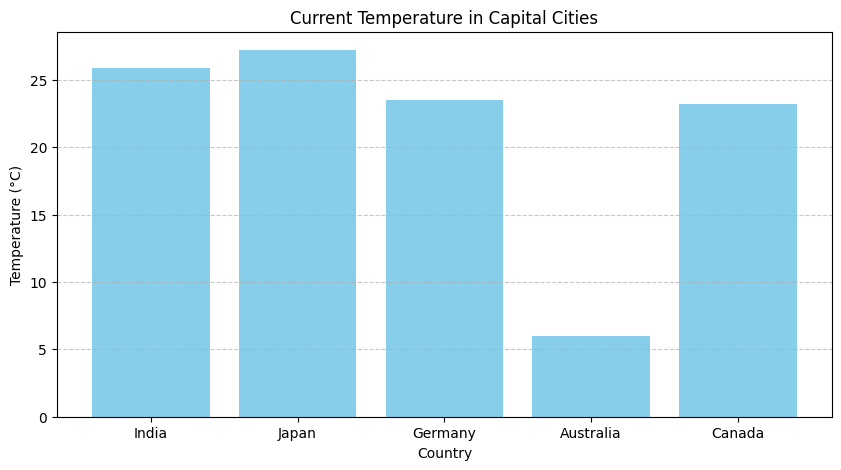

In [9]:
# Step 5: Visualize
plt.figure(figsize=(10,5))
plt.bar(df['Country'], df['Temperature (°C)'], color='skyblue')
plt.xlabel("Country")
plt.ylabel("Temperature (°C)")
plt.title("Current Temperature in Capital Cities")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()